<div style="text-align: center; margin: 50px">

<h1 style="text-align: center;">Grover's Algorithm</h1>

</div>

### Overview:
[Importing Necessary Libraries and Provider](#part1)<br><br>
[Steps involved](#sdc)<br><br>
     a.[Initialization](#sdc1)<br>
     b.[Oracle preparation](#sdc2)<br>
     c.[Grovers Diffusion operator](#sdc3)<br>
     d.[Executing on a simulator](#sdc4)<br> 
     e.[Executing on a real quantum device](#sdc5)<br>

<a id = 'part1'></a>
### Importing Necessary Libraries and Provider:

In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.ibmq import least_busy
provider = IBMQ.load_account()

<a id = 'sdc_1'></a>
### Steps Involved

<a id = 'sdc1'></a>
### Initialization

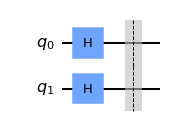

In [2]:
## Initialising with equal superposition:
def initialize(qc):
    qc.h(0)         
    qc.h(1)         
    qc.barrier()
grover_circuit = QuantumCircuit(2)
initialize(grover_circuit)
grover_circuit.draw('mpl')

<a id = 'sdc2'></a>
## Oracle preparation

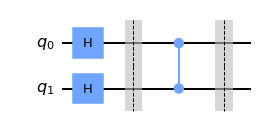

In [3]:
## Oracle preparation for |11>:
def oracle_for_11(qc):
    qc.cz(0,1)
    qc.barrier()
oracle_for_11(grover_circuit)
grover_circuit.draw('mpl')

<a id = 'sdc3'></a>
### Grover's Diffusion operator

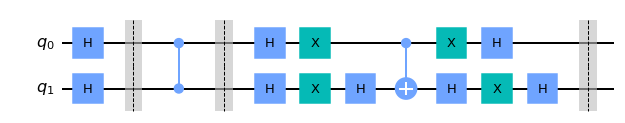

In [4]:
## Creating Grover's Diffusion operator:
def grov_diff(qc):
    qc.h(0)
    qc.h(1)
    qc.x(0)
    qc.x(1)
    qc.h(1)
    qc.cx(0,1)
    qc.x(0)
    qc.h(1)
    qc.h(0)
    qc.x(1)
    qc.h(1)
    qc.barrier()
grov_diff(grover_circuit)        ## to see what grov_diff looks like
grover_circuit.draw('mpl')

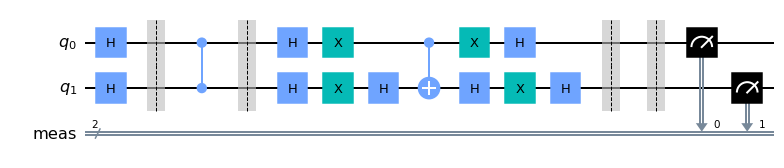

In [5]:
## Measuring the circuit:
grover_circuit.measure_all()
grover_circuit.draw('mpl')

<a id = 'sdc4'></a>
### Executing on a simulator

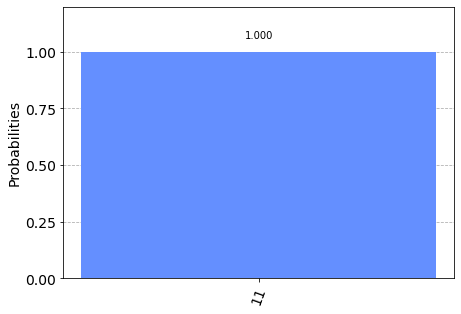

In [6]:
backend = Aer.get_backend('qasm_simulator')
job = execute(grover_circuit, backend, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

<a id = 'sdc5'></a>
## Executing on a real quantum device

In [7]:
## Executing on a real quantum device:
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmqx2


In [8]:
## Monitoring the job:
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, backend, optimization_level=3)
qobj = assemble(transpiled_grover_circuit)
job = backend.run(qobj)
job_monitor(job, interval=2)

<ipython-input-8-cb2932bf4604>:5: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


Job Status: job has successfully run


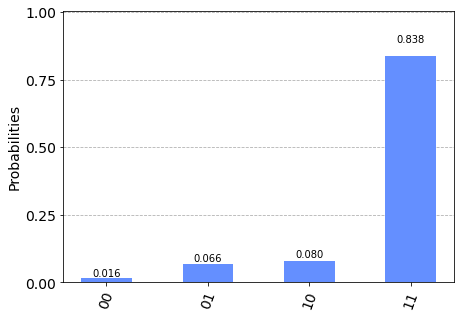

In [9]:
## Getting the results
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)